In [35]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
import os
from skimage import io
from IPython.display import Image
import cv2

In [3]:
folder_path = r'H:\GIT project\Machine Learning with Abolgasemi\5\Q6_Dataset\Images'
format = '.jpg'
image_files = [file for file in os.listdir(folder_path) if file.endswith(format)]
labels = []
blue_list = []
red_list = []
for file in image_files:
    image_path = os.path.join(folder_path, file)
    labels.append(image_path.split(folder_path)[1][1])
    print(image_path.split(folder_path)[1][1])
    image = io.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blue_color =np.mean(image[:, :, 2])
    red_color = np.mean(image[:, :, 0])
    blue_list.append(blue_color)
    red_list.append(red_color)

blue_list = np.array(blue_list)
red_list = np.array(red_list)
result = np.vstack((blue_list,red_list)).T


c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m


In [7]:
# feature = np.concatenate((blue_list,red_list),axis=0)
# print(result)
feature = np.vstack((blue_list,red_list)).T
print(feature)


[[ 99.26688525 146.86811724]
 [171.01490171 188.23024334]
 [ 45.92512668  50.24063587]
 [ 81.87109127  93.94511905]
 [ 95.6880816   77.86399427]
 [ 72.47696574  71.51097247]
 [ 97.00888889  99.73359012]
 [ 91.47658889  91.55820979]
 [ 64.47846492  71.5200499 ]
 [ 93.17457677 100.30676171]
 [ 64.59153621  60.4745019 ]
 [ 42.56133135  42.55076006]
 [ 59.65845545  81.85524752]
 [121.57805353 134.94046057]
 [ 79.623228    89.26700721]
 [ 79.61318245  99.75298789]
 [ 91.04367679  90.17089537]
 [ 85.99728498 102.52344431]
 [ 93.87211008  84.79436491]
 [ 58.23495003  76.78499762]
 [ 50.83468366  59.73873069]
 [ 65.67501891 119.52137484]
 [ 57.80925981  69.51258818]
 [ 53.73367184  51.08191955]
 [109.935      123.84184524]
 [ 92.51311547  99.43207419]
 [117.43666667  57.79483936]
 [ 74.59443474  79.46352017]
 [ 94.31972694  83.82878239]
 [ 40.03278786  42.87330785]
 [ 73.95455539 106.12987581]
 [ 67.09617717  83.77548059]
 [ 99.5475752  102.23887602]
 [ 96.80637854 121.30297069]
 [118.69732346

In [13]:

print(np.amin(blue_list))
print(np.amax(blue_list))

36.82984600099354
171.0149017121116


In [11]:

print(np.amin(red_list))
print(np.amax(red_list))

23.84121212121212
188.2302433417882


C:\Users\M.M\AppData\Local\Temp\ipykernel_3844\1876039339.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(feature[:,0],feature[:,1],cmap="viridis");


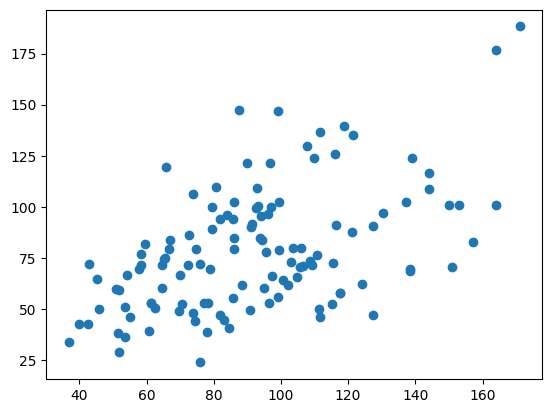

covariance matrix :  [[[750.50925833 268.02257105]
  [268.02257105 973.96356225]]

 [[399.9097764  132.02703445]
  [132.02703445 308.16754808]]]
weights(alpha) :  [0.55838044 0.44161956]
mean :   [[106.81416325  91.77359052]
 [ 73.21415131  62.11229303]]


C:\Users\M.M\AppData\Local\Temp\ipykernel_30332\658779334.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)


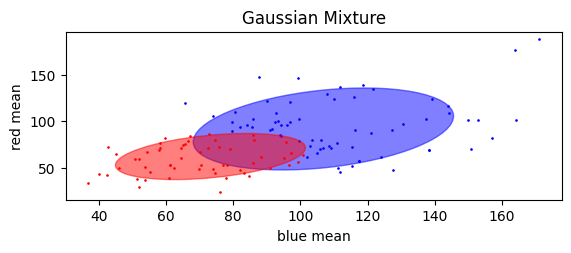

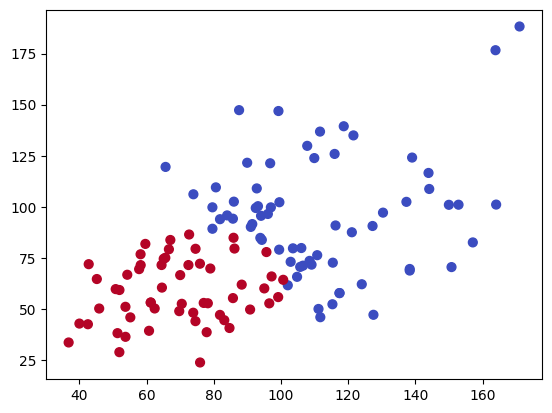

In [52]:

color_iter = itertools.cycle([  'blue',
                              'red'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])

        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.title(title)



gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(feature)

weight = gmm.weights_
mean = gmm.means_
cov = gmm.covariances_
print("covariance matrix : ",cov)
print("weights : ",weight)
print("mean :  ",mean)




plot_results(feature, gmm.predict(feature), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')



plt.xlabel('blue mean')
plt.ylabel('red mean')
plt.show()

plt.scatter(feature[:,0],feature[:,1],c=gmm.predict(feature), s=40, cmap='coolwarm');


C:\Users\M.M\AppData\Local\Temp\ipykernel_30332\1554531592.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


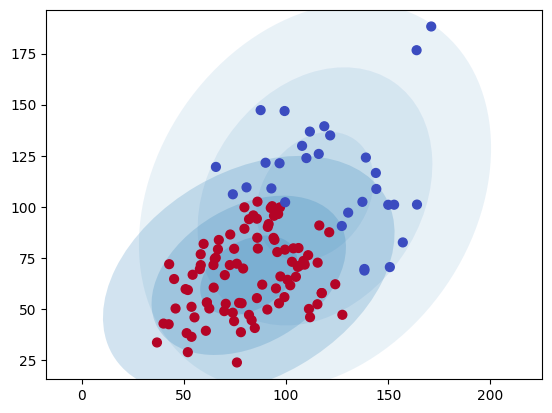

In [60]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='coolwarm', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)



plot_gmm(gmm, result)


In [51]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_components': [2, 3, 4],  # Try different numbers of components
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # Try different covariance types
    'init_params': ['kmeans', 'random']  # Try different initialization methods
}

# Create a Gaussian Mixture Model object
gmm = GaussianMixture()

# Perform grid search using cross-validation
grid_search = GridSearchCV(gmm, param_grid=param_grid, cv=5)  # Adjust the number of CV folds as needed

# Fit the grid search on the data
grid_search.fit(feature)  # X is your input data

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

parameter =gmm.get_params()
print(parameter)

Best parameters: {'covariance_type': 'spherical', 'init_params': 'random', 'n_components': 2}
{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 1, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
gmm = GaussianMixture()
# evaluate model
scores = cross_val_score(gmm, feature , labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.000 (0.000)


In [78]:
from sklearn.model_selection import cross_validate

clf = GaussianMixture(n_components=len(np.unique(labels)), covariance_type='full')

cv_ortho = cross_validate(clf, feature, labels, cv=10, n_jobs=-1)

print(cv_ortho)

{'fit_time': array([0.00698686, 0.00498724, 0.00898576, 0.00600123, 0.00500059,
       0.00800014, 0.00600123, 0.00499988, 0.00600171, 0.0080018 ]), 'score_time': array([0.        , 0.00099897, 0.        , 0.        , 0.        ,
       0.00100303, 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([-9.67338509, -9.57185206, -9.38636368, -9.418538  , -9.8391285 ,
       -9.53942029, -9.61228284, -9.73321312, -9.40503766, -9.60938563])}


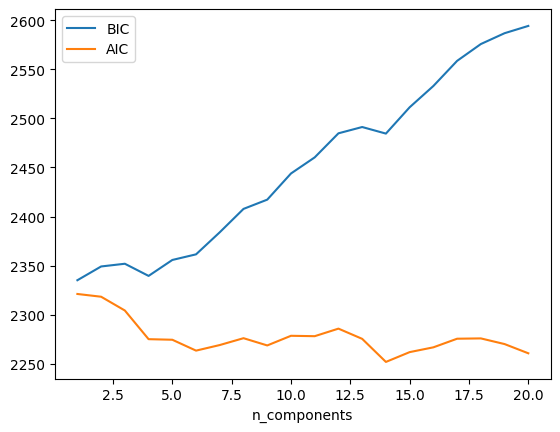

In [82]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(feature)
          for n in n_components]

plt.plot(n_components, [m.bic(feature) for m in models], label='BIC')
plt.plot(n_components, [m.aic(feature) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

-9.303143883036155


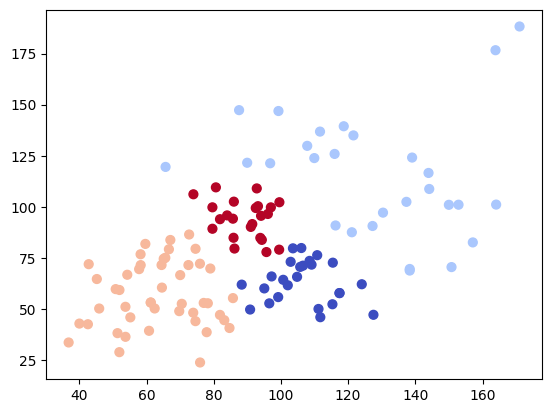

In [69]:
best_components =4
best_gmm = GaussianMixture(n_components=best_components, max_iter=100, random_state=42).fit(result)

best_labels = best_gmm.predict(result)
score = best_gmm.score(result)
print(score) 
plt.scatter(result[:, 0], result[:, 1], c=best_labels, s=40, cmap=plt.cm.coolwarm)
plt.show()

In [48]:
from sklearn.model_selection import KFold
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
classifier = GaussianMixture()
scores = cross_val_score(classifier, feature, labels, cv=kf, scoring='accuracy')


# Calculate mean and standard deviation of scores
mean_score = scores.mean()
std_dev = scores.std()

# Print the results
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_dev)

Mean Accuracy: 0.0
Standard Deviation: 0.0


[-9.596390434332383, -9.600927169518483, -9.571189380771305, -9.743159132939024, -9.786925210176824, -9.714568221759844, -9.759504811296031, -10.00842530627995, -10.288599487108746, -10.480938752974678, -10.711535979674847, -10.696198632819813, -10.884584235967191, -11.499367597059765, -11.514884703760833]
best_score =  -9.571189380771305


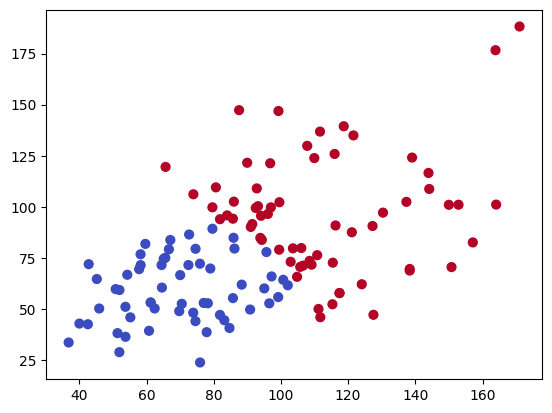

Best number of components: 2


In [83]:


score_mean=[]
kf = KFold(n_splits=7)
for k in range(1, 16):
    score_list = []
    for train, test in kf.split(result):
        gmm = GaussianMixture(n_components=k, max_iter=100, random_state=42).fit(result[train])
        labels = gmm.predict(result[test])
        score = gmm.score(result[test]) 
        score_list.append(score)

    score_mean.append(sum(score_list) / len(score_list))

print(score_mean)
best_score = max(score_mean)
print("best_score = " , best_score)

best_components = score_mean.index(best_score)
best_gmm = GaussianMixture(n_components=best_components, max_iter=1000, random_state=42).fit(result)

# Use the best GMM for prediction or further analysis
best_labels = best_gmm.predict(result)

# Plot the results using the best GMM
plt.scatter(result[:, 0], result[:, 1], c=best_labels, s=40, cmap=plt.cm.coolwarm)
plt.show()

# Print the best number of components
print("Best number of components:", best_components)